In [2]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,SimpleRNN,GRU
from keras.datasets import imdb
import numpy as np

## 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

In [3]:
max_features = 20000
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train_L, y_train_L), (x_test_L, y_test_L) = imdb.load_data(num_words=max_features)
print(len(x_train_L), 'train sequences')
print(len(x_test_L), 'test sequences')


Loading data...
17465344/17464789 [==============================] - 3s 0us/step
25000 train sequences
25000 test sequences


In [4]:
np.unique(y_train_L,return_index=True)


(array([0, 1]), array([1, 0]))

In [5]:
y_test_L.shape


(25000,)

In [9]:
x_train_L

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [6]:
# 今回は学習データをランダムに50％まで減らす
from sklearn.model_selection import train_test_split
x_train, _x, y_train, _y = train_test_split(x_train_L, y_train_L, test_size=0.5, random_state=42)
x_test, _X, y_test, _Y = train_test_split(x_test_L, y_test_L, test_size=0.5, random_state=42)
x_train.shape

(12500,)

## SimpleRNN

In [7]:
# SimpleRNN
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)#シーケンスを同じ長さになるように詰めます．
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))#固定長の分散表現に変換
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))#全結合

# 異なるオプティマイザーと異なるオプティマイザー設定を使用してみてください
model.compile(loss='binary_crossentropy',#2値分類のloss
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (12500, 80)
x_test shape: (12500, 80)
Build model...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...

Train on 12500 samples, validate on 12500 samples
Epoch 1/15
12500/12500 [==============================] - 32s 3ms/step - loss: 0.6991 - accuracy: 0.5226 - val_loss: 0.6876 - val_accuracy: 0.5183
Epoch 2/15
12500/12500 [==============================] - 31s 2ms/step - loss: 0.6339 - accuracy: 0.6330 - val_loss: 0.6571 - val_accuracy: 0.5822
Epoch 3/15
12500/12500 [==============================] - 30s 2ms/step - loss: 0.5632 - accuracy: 0.7086 - val_loss: 0.6469 - val_accuracy: 0.6302
Epoch 4/15
12500/12500 [==============================] - 30s 2ms/step - loss: 0.4860 - accuracy: 0.7626 - val_loss: 0.6216 - val_accuracy: 0.6754
Epoch 5/15
12500/12500 [==============================] - 29s 2ms/step - loss: 0.4144 - accuracy: 0.8099 - val_loss: 0.5672 - val_accuracy: 0.7326
Epoch 6/15
1

## GRU

In [10]:
# GRU
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)#シーケンスを同じ長さになるように詰める（今回の1シーケンスは１レビュー．それを全レビューの中で最も単語数が多いシーケンスの長さに合わせる＝単語数をそろえる）
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))#正の整数（インデックス）を固定次元の密ベクトルに変換
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))#全結合

# 異なるオプティマイザーと異なるオプティマイザー設定を使用してみてください
model.compile(loss='binary_crossentropy',#2値分類のloss
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (12500, 80)
x_test shape: (12500, 80)
Build model...
Train...
Train on 12500 samples, validate on 12500 samples
Epoch 1/15
12500/12500 [==============================] - 71s 6ms/step - loss: 1.9195 - accuracy: 0.6614 - val_loss: 0.6035 - val_accuracy: 0.6626
Epoch 2/15
12500/12500 [==============================] - 79s 6ms/step - loss: 0.8488 - accuracy: 0.7410 - val_loss: 0.6139 - val_accuracy: 0.6537
Epoch 3/15
12500/12500 [==============================] - 65s 5ms/step - loss: 0.5054 - accuracy: 0.7847 - val_loss: 0.6043 - val_accuracy: 0.6681
Epoch 4/15
12500/12500 [==============================] - 59s 5ms/step - loss: 247.8063 - accuracy: 0.8076 - val_loss: 0.6302 - val_accuracy: 0.6431
Epoch 5/15
12500/12500 [==============================] - 58s 5ms/step - loss: 0.4381 - accuracy: 0.8055 - val_loss: 0.6301 - val_accuracy: 0.6630
Epoch 6/15
12500/12500 [==============================] - 323s 26ms/step - loss: 1.3128 - accuracy: 0.831

## LSTM

In [8]:
# LSTM
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (12500, 80)
x_test shape: (12500, 80)
Build model...
Train...
Train on 12500 samples, validate on 12500 samples
Epoch 1/15
12500/12500 [==============================] - 70s 6ms/step - loss: 0.5023 - accuracy: 0.7526 - val_loss: 0.4023 - val_accuracy: 0.8201
Epoch 2/15
12500/12500 [==============================] - 71s 6ms/step - loss: 0.3035 - accuracy: 0.8756 - val_loss: 0.4148 - val_accuracy: 0.8153
Epoch 3/15
12500/12500 [==============================] - 74s 6ms/step - loss: 0.2013 - accuracy: 0.9239 - val_loss: 0.4775 - val_accuracy: 0.8162
Epoch 4/15
12500/12500 [==============================] - 64s 5ms/step - loss: 0.1291 - accuracy: 0.9531 - val_loss: 0.6300 - val_accuracy: 0.7864
Epoch 5/15
12500/12500 [==============================] - 71s 6ms/step - loss: 0.0941 - accuracy: 0.9655 - val_loss: 0.6727 - val_accuracy: 0.7958
Epoch 6/15
12500/12500 [==============================] - 71s 6ms/step - loss: 0.0619 - accuracy: 0.9784 - 

## ConvLSTM2D

Train on 950 samples, validate on 50 samples
Epoch 1/1
950/950 [==============================] - 6800s 7s/step - loss: 0.2580 - val_loss: 0.5405


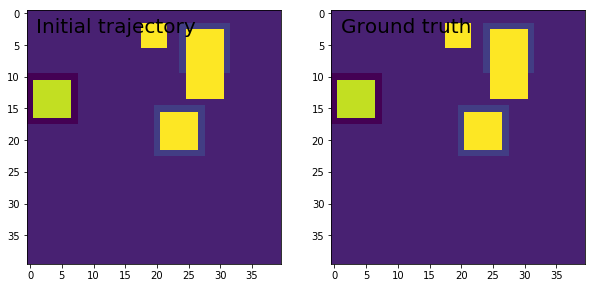

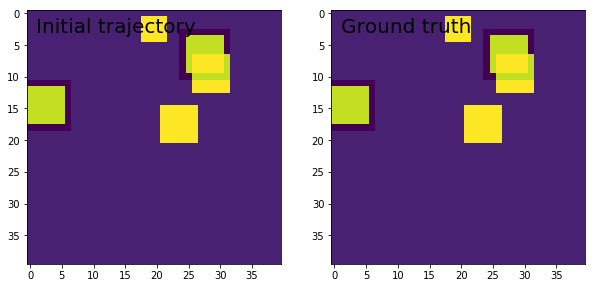

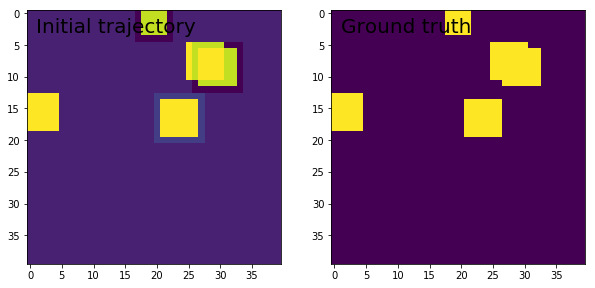

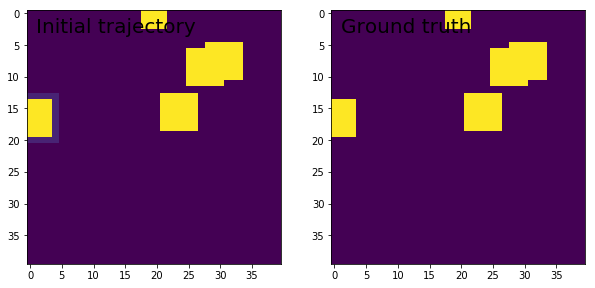

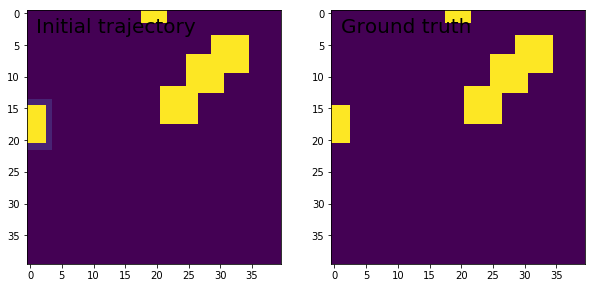

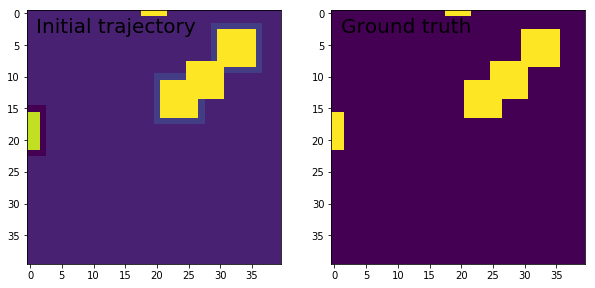

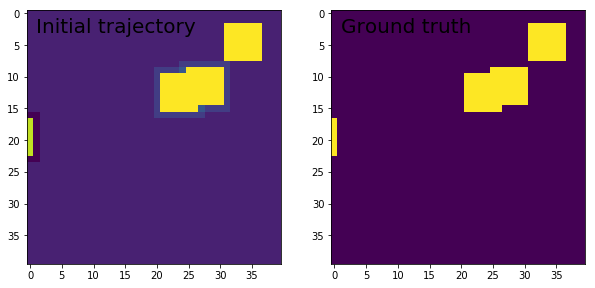

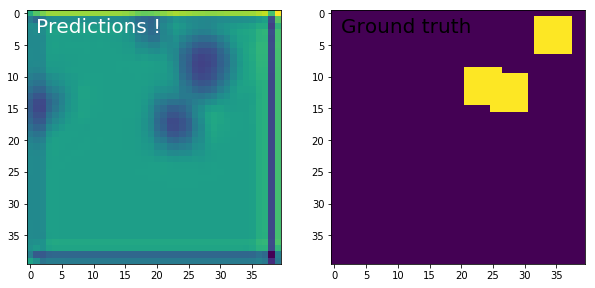

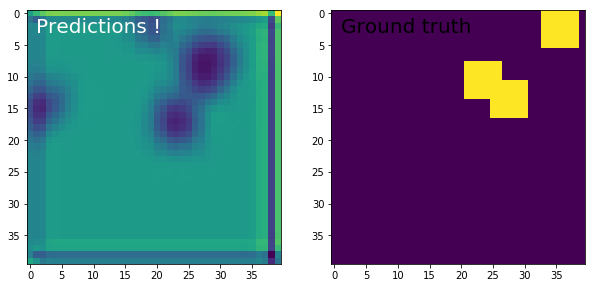

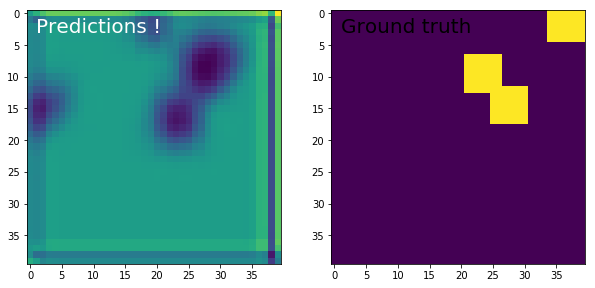

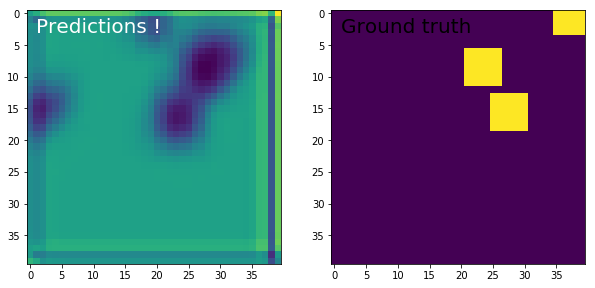

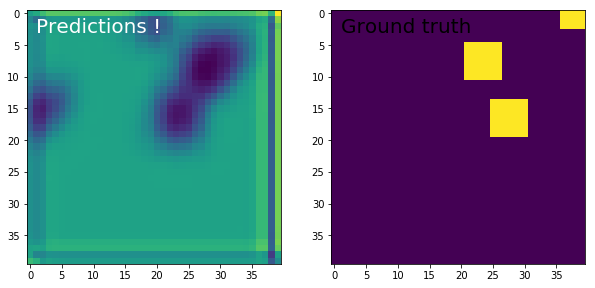

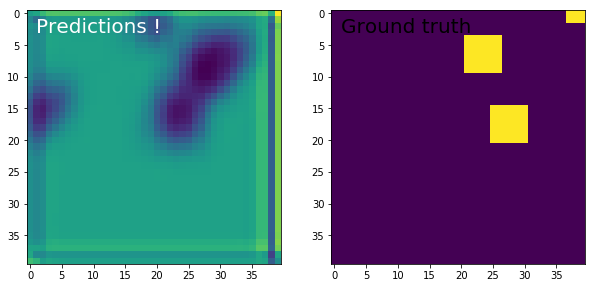

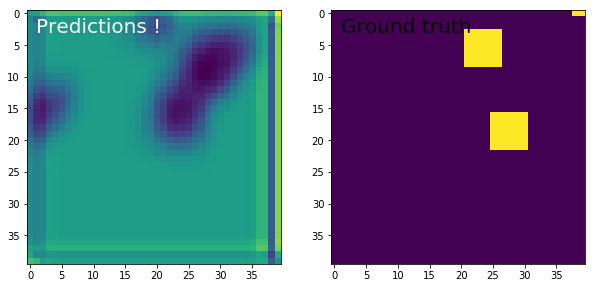

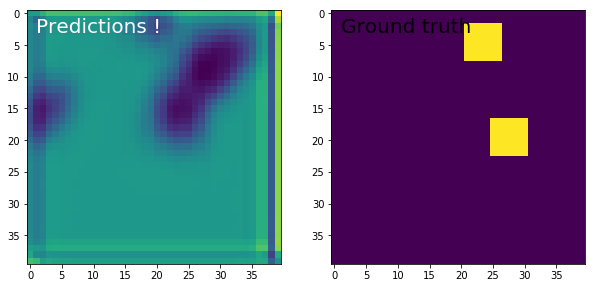

In [12]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=1, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

長時間学習を続けたのに

In [11]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=50, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

Train on 950 samples, validate on 50 samples
Epoch 1/50
950/950 [==============================] - 1540s 2s/step - loss: 0.2356 - val_loss: 0.5196
Epoch 2/50
950/950 [==============================] - 1401s 1s/step - loss: 0.0338 - val_loss: 0.2948
Epoch 3/50
950/950 [==============================] - 1383s 1s/step - loss: 0.0057 - val_loss: 0.2824
Epoch 4/50
950/950 [==============================] - 1390s 1s/step - loss: 0.0052 - val_loss: 0.2895
Epoch 5/50
950/950 [==============================] - 1395s 1s/step - loss: 0.0012 - val_loss: 0.2082
Epoch 6/50
950/950 [==============================] - 1394s 1s/step - loss: 8.0153e-04 - val_loss: 0.0172
Epoch 7/50
950/950 [==============================] - 1393s 1s/step - loss: 5.8507e-04 - val_loss: 0.0017
Epoch 8/50
950/950 [==============================] - 1403s 1s/step - loss: 4.9137e-04 - val_loss: 8.0105e-04
Epoch 9/50
950/950 [==============================] - 1413s 1s/step - loss: 4.1130e-04 - val_loss: 7.9189e-04
Epoch 10/50
9

## 【問題3】他のクラスの説明
### １．RNN
keras.layers.RNN(cell, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)

Recurrentレイヤーに対する基底クラス．
callメソッドに(input_at_t, states_at_t)を渡せば，(output_at_t, states_at_t_plus_1)を返し，RNNを構築できる．


### ２．SimpleRNNCell
keras.layers.SimpleRNNCell(units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0)　　　　　 　　　　　　　　　　　

出力が入力にフィードバックされる全結合RNN
入力した値から予測値を返すが、その次の入力値に前回の入力値を加えて予測を返す


### ３．GRUCell 
keras.layers.GRUCell(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1)
GRUレイヤーのためのCellクラス．
ゲートつきRNN
勾配消失問題を解決したネットワークのcellクラス
更新ゲートを持ち、前回の値をどれだけ保持して前に渡すかを決めてから渡すRNN
LSTMに比べゲートの数が異なる


### ４．LSTMCell
keras.layers.LSTMCell(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1)

LSTMレイヤーのためのcellクラス．
ゲートつきRNN GRUと同じく勾配消失問題を解決したネットワークのcell
入力、出力、忘却ゲートを持つ
入力ゲートで入力値をどれだけ処理するか
出力ゲートで出力の値をどれだけにするか
忘却ゲートで、保持している値をどれだけ保持するかを決める


### ５．StackedRNNCells
keras.layers.StackedRNNCells(cells)

RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー
cellを繋げて一つの単位として構成できる


### ６．CuDNNGRU
CuDNNを利用した高速なGRU実装

### ７．CuDNNLSTM
CuDNNを利用した高速なLSTM実装．